# ANN ON MNIST DATA | PROJECT#03 | DL

### IMPORTING LIBRARIES

In [34]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### LOADING AND EXPLORING THE DATA

In [35]:
data = pd.read_csv('Data/train.csv')

In [36]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [38]:
data.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

### DATA PREPERATION

In [39]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into TEST and training sets

### SPLITTING DATA INTO TEST AND TRAINING SETS

In [40]:
data_test = data[0:1000].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255.

In [41]:
print(X_test)
print(Y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[2 1 9 0 7 9 8 8 6 1 3 9 4 8 1 6 0 2 6 7 8 6 2 4 7 1 0 7 3 0 9 5 9 1 7 8 5
 7 5 9 7 9 8 1 0 4 3 5 7 8 3 0 0 4 1 1 8 0 8 5 7 7 0 8 3 6 2 0 0 3 3 5 3 0
 3 4 7 2 0 3 6 3 4 7 8 8 9 7 4 9 9 1 9 6 9 3 0 0 4 5 1 1 1 7 7 2 9 4 5 7 0
 2 9 9 2 9 2 6 1 9 9 3 7 7 9 8 1 1 2 7 4 6 9 5 1 5 4 4 4 7 1 9 4 1 8 1 6 4
 3 1 6 2 3 2 7 1 8 9 0 2 6 2 4 5 3 7 2 0 4 5 5 0 1 0 9 1 9 3 7 0 1 1 9 2 2
 6 6 1 3 9 3 4 9 4 6 7 3 9 4 8 6 8 5 0 2 4 1 0 3 4 7 1 1 3 8 9 8 6 0 5 9 7
 6 6 5 9 7 1 9 4 7 8 6 7 9 9 9 6 7 3 4 5 2 5 1 7 8 6 1 4 7 8 4 3 1 2 4 2 9
 0 0 7 8 4 9 1 6 3 1 4 0 5 3 6 2 5 6 3 1 5 3 5 3 4 1 8 5 4 2 9 2 9 8 3 7 3
 5 5 6 5 0 8 9 2 0 3 2 7 4 1 8 0 3 7 0 4 7 4 9 8 6 1 1 0 6 7 2 5 6 9 6 0 3
 3 0 5 8 0 9 7 5 7 4 2 7 4 3 7 8 7 9 8 3 2 0 4 0 6 4 6 5 0 4 1 0 7 7 4 1 1
 0 8 9 3 8 1 1 4 1 5 0 0 8 2 0 9 2 4 9 2 1 4 5 3 9 1 9 0 4 2 3 5 7 7 5 4 3
 7 6 6 5 6 7 8 6 3 

In [42]:
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [43]:
print(Y_train)

[3 0 8 ... 1 8 7]


In [44]:
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### INITIALIZING PARAMETERS

In [46]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

### ACTIVATION FUNCTIONS

In [47]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

### FORWARD PROPAGATION

In [48]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

### DERIVATIVE OF ReLU

In [49]:
def ReLU_deriv(Z):
    return Z > 0

### ONE-HOT ENCODING

In [50]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

### BACKWARD PROPAGATION

In [51]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

### UPDATING PARAMETERS

In [52]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

### MAKING PREDICTIONS

In [53]:
def get_predictions(A2):
    return np.argmax(A2, 0)


In [54]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

### TRAINEING THE MODEL

In [55]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(f"The Accuracy on train data is: ", get_accuracy(predictions, Y))
    return W1, b1, W2, b2

### FINAL MODEL TRAINING AND EVALUATION

In [56]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[4 4 4 ... 4 9 4] [3 0 8 ... 1 8 7]
The Accuracy on train data is:  0.07897560975609756
Iteration:  10
[2 0 9 ... 1 9 2] [3 0 8 ... 1 8 7]
The Accuracy on train data is:  0.18090243902439024
Iteration:  20
[3 0 2 ... 1 1 3] [3 0 8 ... 1 8 7]
The Accuracy on train data is:  0.31153658536585366
Iteration:  30
[3 0 7 ... 1 1 7] [3 0 8 ... 1 8 7]
The Accuracy on train data is:  0.38590243902439025
Iteration:  40
[3 0 9 ... 1 1 7] [3 0 8 ... 1 8 7]
The Accuracy on train data is:  0.4350731707317073
Iteration:  50
[3 0 9 ... 1 1 7] [3 0 8 ... 1 8 7]
The Accuracy on train data is:  0.47553658536585364
Iteration:  60
[3 0 9 ... 1 5 7] [3 0 8 ... 1 8 7]
The Accuracy on train data is:  0.5095121951219512
Iteration:  70
[3 0 9 ... 1 5 7] [3 0 8 ... 1 8 7]
The Accuracy on train data is:  0.5438536585365854
Iteration:  80
[3 0 9 ... 5 5 7] [3 0 8 ... 1 8 7]
The Accuracy on train data is:  0.5770243902439024
Iteration:  90
[3 0 9 ... 5 5 7] [3 0 8 ... 1 8 7]
The Accuracy on train data 

In [57]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions


In [58]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


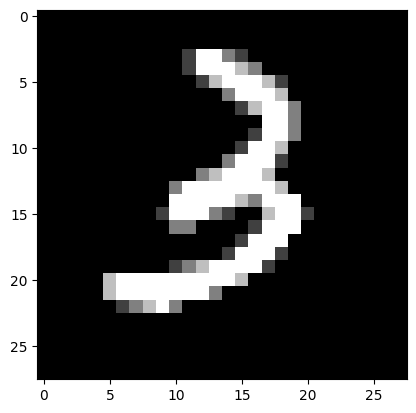

Prediction:  [0]
Label:  0


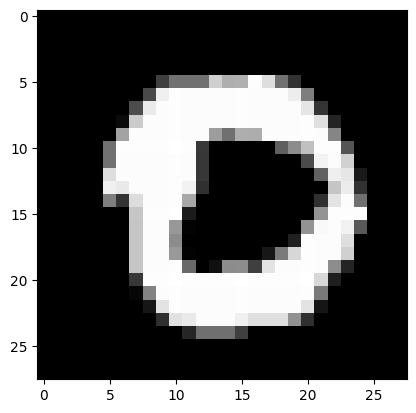

Prediction:  [8]
Label:  8


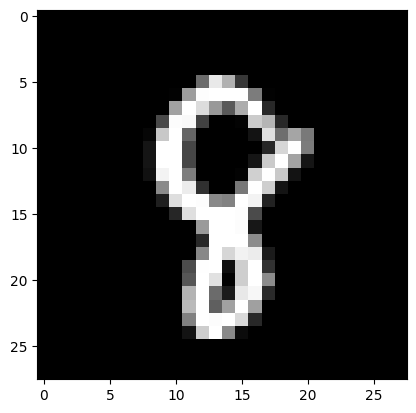

Prediction:  [4]
Label:  4


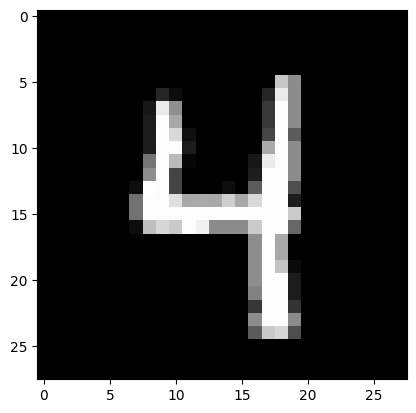

In [59]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [60]:
dev_predictions = make_predictions(X_test, W1, b1, W2, b2)

In [61]:
print(f"The Accuracy of ANN on test data is: ", get_accuracy(dev_predictions, Y_test))

[2 1 9 0 4 9 8 2 6 1 3 7 9 8 1 6 0 3 6 7 8 6 2 4 7 1 0 7 3 0 9 8 9 1 7 8 2
 7 5 9 4 9 1 1 0 4 3 5 3 8 3 0 0 4 1 1 8 0 1 3 7 7 0 5 3 6 2 0 0 3 3 5 3 0
 3 4 7 2 0 3 6 5 4 7 8 8 9 4 4 9 9 1 9 6 9 5 0 0 4 5 1 1 1 7 7 2 9 4 5 7 0
 2 9 9 3 9 2 2 8 7 9 3 7 9 9 8 1 1 2 7 4 6 0 5 1 3 4 4 4 7 1 9 4 1 8 1 6 4
 3 1 6 2 3 2 7 1 9 9 0 2 6 2 4 6 3 7 2 0 4 5 5 0 1 0 9 1 9 3 7 0 1 1 9 6 2
 6 6 1 3 9 3 9 9 8 6 7 3 9 4 8 6 8 5 0 2 9 1 0 3 4 7 1 1 3 8 9 6 6 0 5 7 7
 6 6 5 9 9 1 7 7 7 3 6 7 9 9 9 6 7 3 4 5 2 5 1 7 8 6 1 9 3 4 4 3 1 2 4 2 9
 0 0 7 6 4 7 7 6 3 1 9 0 5 3 6 2 5 6 2 1 5 3 5 5 4 1 8 1 4 2 7 2 4 8 3 7 3
 5 5 6 5 0 8 9 2 0 3 2 7 4 1 8 0 3 7 0 4 7 4 9 6 6 1 1 0 6 7 2 5 6 9 6 0 3
 3 0 5 8 0 9 7 5 7 4 2 7 4 3 9 8 7 9 1 3 2 0 4 0 6 4 6 6 0 4 1 2 2 7 7 1 1
 0 9 7 5 8 1 1 4 1 8 0 6 9 2 0 9 2 4 9 2 1 9 1 2 9 1 9 0 4 2 3 5 7 7 5 8 3
 7 6 6 8 6 7 8 6 3 7 5 8 1 2 5 3 2 7 0 5 2 8 9 6 3 9 0 6 7 8 9 8 6 9 6 6 7
 2 2 1 7 2 4 0 6 2 8 0 4 2 6 1 1 7 4 0 9 3 7 9 0 1 4 1 5 1 1 9 1 6 3 1 7 1
 5 5 6 3 1 4 7 8 7 1 1 2 